# Importe Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [3]:
iris_data = pd.read_csv('C:/Users/pc/Desktop/iris/IRIS.csv', encoding='latin-1')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Prepocessing the dataset

In [13]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

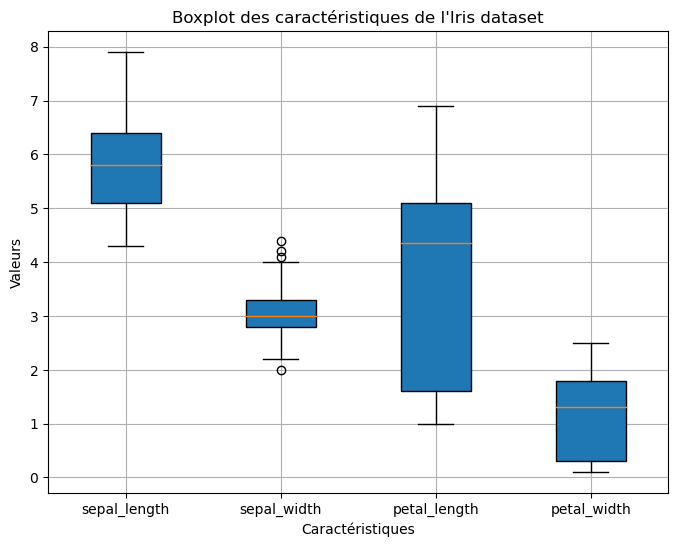

In [18]:
selected_columns = iris_data.iloc[:, 0:4]

plt.figure(figsize=(8, 6))
plt.boxplot(selected_columns.values, patch_artist=True)
plt.xticks([1, 2, 3, 4], iris_data.columns[0:4]) 
plt.title('Boxplot des caractéristiques de l\'Iris dataset')
plt.xlabel('Caractéristiques')
plt.ylabel('Valeurs')
plt.grid(True)
plt.show()


<AxesSubplot:>

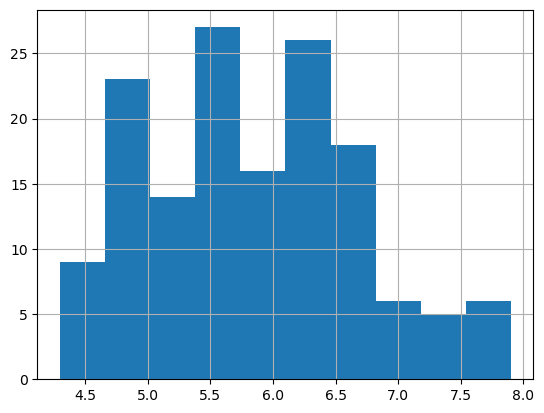

In [19]:
iris_data['sepal_length'].hist()

<AxesSubplot:>

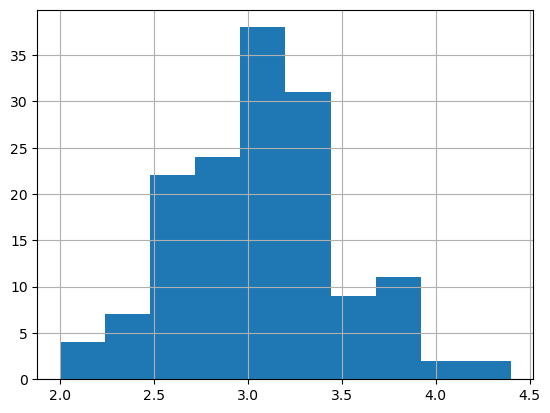

In [20]:
iris_data['sepal_width'].hist()

<AxesSubplot:>

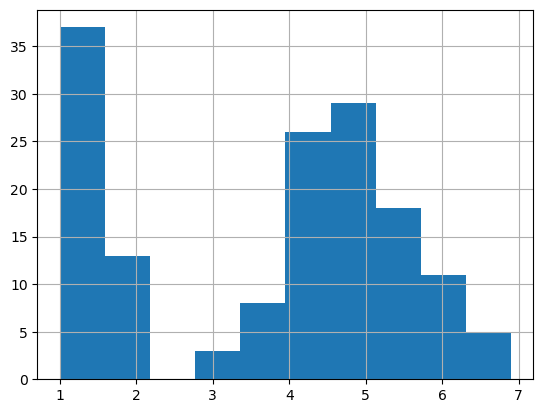

In [21]:
iris_data['petal_length'].hist()

<AxesSubplot:>

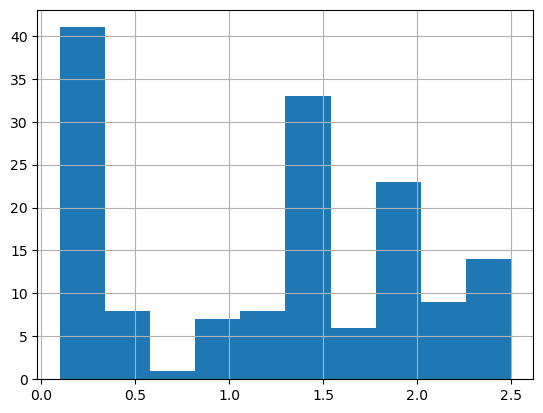

In [23]:
iris_data['petal_width'].hist()

In [24]:
color=['red','green','black']
Species = ['Iris-setosa','Iris-versicolor','Iris-virginica']


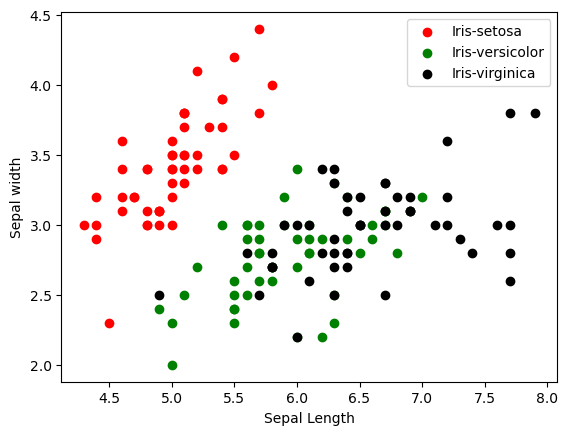

In [26]:
for i in range(3):
    x=iris_data[iris_data['species']==Species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'] , c=color[i] ,label=Species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal width")
    plt.legend()

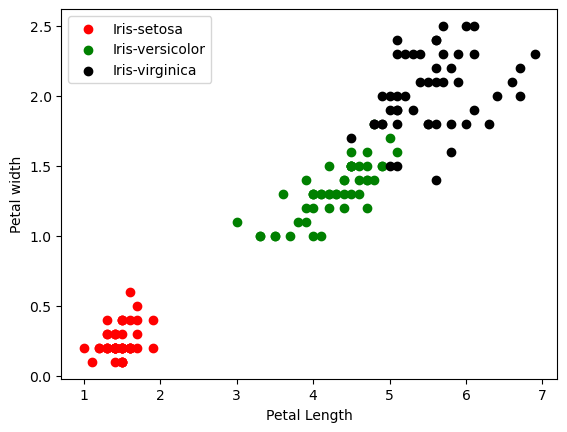

In [27]:
for i in range(3):
    x=iris_data[iris_data['species']==Species[i]]
    plt.scatter(x['petal_length'],x['petal_width'] , c=color[i] ,label=Species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal width")
    plt.legend()

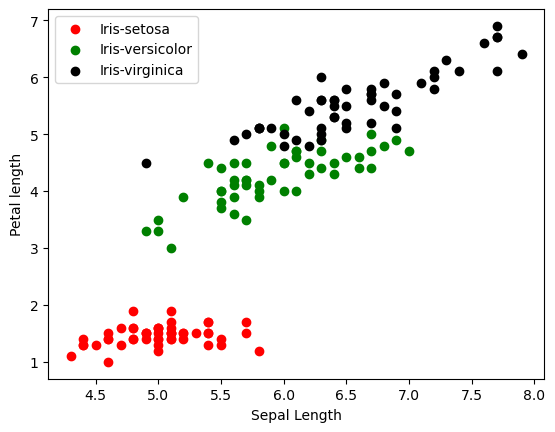

In [28]:
for i in range(3):
    x=iris_data[iris_data['species']==Species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'] , c=color[i] ,label=Species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal length")
    plt.legend()

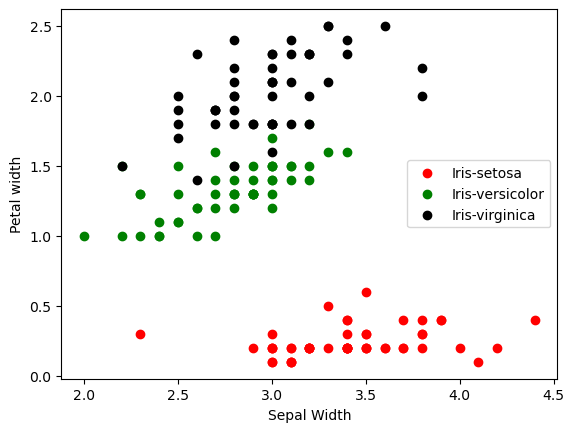

In [29]:
for i in range(3):
    x=iris_data[iris_data['species']==Species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'] , c=color[i] ,label=Species[i])
    plt.xlabel("Sepal Width")
    plt.ylabel("Petal width")
    plt.legend()

# Coorelation Matrix

In [30]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

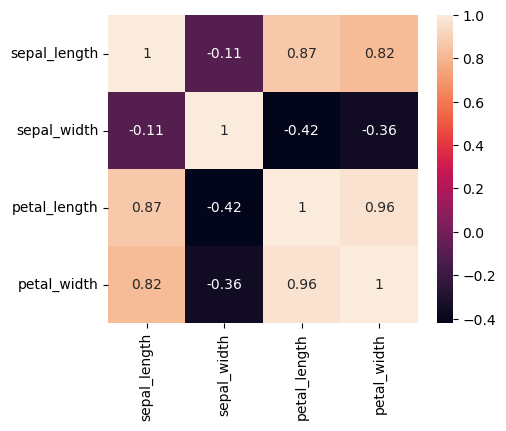

In [32]:
corr = iris_data.corr()
fig , ax= plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

# Label Encoder

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
iris_data['species'] = le.fit_transform(iris_data['species'])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [35]:
from sklearn.model_selection import train_test_split

X= iris_data.drop(columns=['species'])
Y= iris_data['species']
x_train ,x_test , y_train , y_test = train_test_split(X,Y, test_size=0.30)

In [36]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [45]:
model.fit(x_train,y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
print("Accuracy :",model.score(x_test,y_test)*100)

Accuracy : 95.55555555555556


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Entraîner le modèle
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [48]:
print("Accuracy :",knn.score(x_test,y_test)*100)

Accuracy : 95.55555555555556


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")

print(conf_matrix)


Précision du modèle : 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92        12
           2       1.00      0.90      0.95        20

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45

Matrice de confusion :
[[13  0  0]
 [ 0 12  0]
 [ 0  2 18]]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


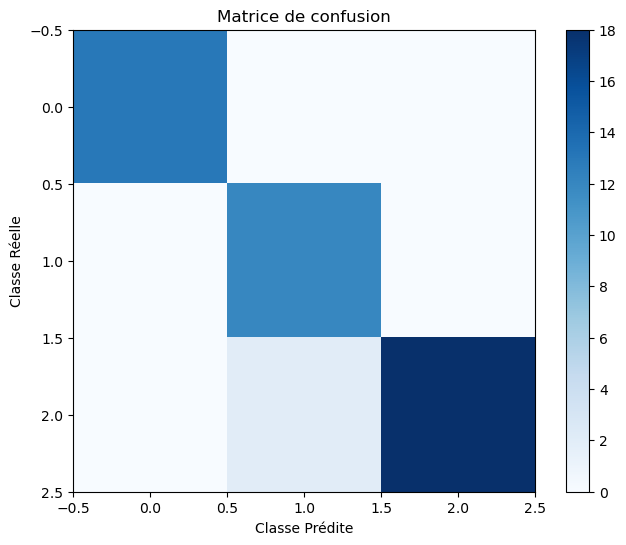

In [52]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.show()
